# Lecture 2: Optimization


"Learning in practice"

Introduction to basic optimization


Resources:
1. https://cs229.stanford.edu/section/cs229-linalg.pdf

1. https://www.princeton.edu/~aaa/Public/Teaching/ORF363_COS323/F15/ORF363_COS323_F15_Lec5.pdf

2. https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf

3. https://web.stanford.edu/class/ee364a/lectures/functions.pdf





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math

# from google.colab import drive
# drive.mount('/content/drive')
# import IPython.display
# %cd /content/drive/MyDrive/stat335fall22/Lectures/Lecture7.5-Learning-Theory/

# Optimization

The statistical learning framework demands that for any problem we have

1. Data points $Z = (X, Y)$ and data sequence $\{Z_i\}_{i = 1}^n$
2. Model class $\mathcal{F}= \{ f: X \mapsto Y \}$
3. Loss function $\mathcal{L}: (f, Z) \mapsto \mathbb{R}$


The model class limits the kinds of model we consider (i.e. linear regression, splines, neural networks)

The loss function decides which model from the class should be chosen 

$$ \hat f = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, Z)$$

e.x. $\mathcal{L}(f, Z) = ||Y - f(X)||_2$

We can learn $\hat f$ directly from the data and our assumptions through __optimization__

Optimization is the (automatic) process of finding the minimum or maximum value of a function. These two objectives are actually equivalent, so in machine learning we typically focus on _minimization_.

A generic minimization problem is written as 

1. _Given_: a function $g: A \mapsto \mathbb{R}$
2. _Seek_: element $x_0 \in A$ such that $g(x_0) \leq g(x)$  $\forall x \in A$

We call the set $A$ the domain or feasible set. These are all possible inputs to $g$ that we will search over to find the minimzer. We call $x_0$ the global minimizer because it produces the smallest value of $g$ over the entire feasible set. 
- Later we will introduce _local_ minimizers

HW: Show that the minimzer of $g$ is the maximizer of $-g$.



## Optimization and ML

Lets translate generic optimization problems into machine learning problems.

We stated that our goal was to find $$\hat f = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, Z)$$

In the optimization format above this would be something like 

1. _Given_: A function $\mathcal{L}:(f, Z) \mapsto \mathbb{R}$
2. _Seek_: $\hat f \in \mathcal{F}$ such that $\mathcal{L}(\hat f, Z) \leq \mathcal{L}(f, Z)$ $\forall f \in \mathcal{F}$

- This is, of course, just a longer restatement of $\hat f = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, Z)$

- Note that we have an extra arguement $Z$ floating around in $\mathcal{L}$. We don't optimize over the data $Z$, only the function $f$, so this term can largely be ignored when we're thinking about optimization. Why? Because the data is fixed ahead of time.
 - Often we can just write $\mathcal{L}(f)$ as shorthand for $\mathcal{L}(f, Z)$ and the "data arguement" is just sort of implied

It's a little hard to think about finding a function $f$ in some class $\mathcal{F}$. What even is $\mathcal{F}$? How do we identify elements of $\mathcal{F}$? etc. 


### Parameterization

Often what we can do is __parameterize__ the functions $f \in \mathcal{F}$. That is we will describe each function $f \in \mathcal{F}$ with a set of numbers (called parameters) $\theta \in \mathbb{R}^p$.

#### Example: Linear functions 

Suppose $x \in \mathbb{R}$ and $\mathcal{F}$ is the set of linear functions. W can write any $f \in \mathcal{F}$ as

$$ f(x) = \alpha + \beta x $$

where $(\alpha, \beta) \in \mathbb{R}^2$. We call the collection $\theta = (\alpha, \beta)$.



Note that we can uniquely express any __linear function__ $f$ with just two __numbers__ $(\alpha, \beta)$. 
 - Given any $f$ we immediately know the $\alpha, \beta$
 - given any set $\alpha, \beta$ we immediately know $f$ 

Thus the two sets $\mathcal{F}$ and $\mathbb{R}^2$ are in some sense equivalent (isomorphic)


This is good news for us
- instead of optimizing over $\mathcal{F}$ (impossible) we can optimize over $\mathbb{R}^2$.
- Easier because we use derivatives to "guide" us around the parameter space to the optima

#### More generally

When we parameterize a function we uniquely identify each function $f \in \mathcal{F}$ with a set of numbers (called parameters) $\theta \in R^p$
 - Thus the space $\mathcal{F}$ and $\mathbb{R}^p$ are "equivalent"
 - Consequently we can rewrite our optimization problem as
 $$\hat \theta = \arg\min_{\theta \in \mathbb{R}^p} \mathcal{L}(f_\theta, Z)$$

 where $f_\theta$ denotes the function $f$ identified by the parameter vector $\theta$. 


So far 
 - Reduced our optimization problem from finding a function in an abstract function space
 - ... to finding a vector in a nice friendly vector space. 
 
To make further progress we need to understand what kind of loss function we're dealing with

## Types of loss functions

In general, there are two classes of optimization problems. 
1. Convex
2. Non-convex

All this means is that your loss function $\mathcal{L}$ is either __convex__ or __non-convex__

Reminder

Suppose $g:X \mapsto Y$ and $x_1, x_2 \in X$. Then $g$ is convex on $X$ if 
 $$g(\alpha x_1 + (1 - \alpha)x_2) \leq \alpha g(x_1) + (1- \alpha)g(x_2)$$

where $\alpha \in [0, 1]$

A function $g$ is non-convex if convexity is violated anywhere on the domain

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Convex_vs._Not-convex.jpg" width="400" height="400"/>
</div>

#### Another way to characterize convex functions


Theorem: Let $g: \mathbb{R} \mapsto \mathbb{R}$, then the following are equivalent
1. $g$ is a convex function
2. $g(y) \geq g(x) + \nabla g'(x)(y - x) \quad \forall x, y \in Dom(g)$
3. $g''(x) \geq 0 \quad \forall x \in Dom(g)$

What does that mean?

2. Means that the first order taylor expansion of $g$ at _any point_ $x$ is beneath $g(y)$ for _any point_ $y$

<div>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMgaGVGo3rJ3P0_xI6S25a9WXJLAl3pG_37A&usqp=CAU" width="500" height="300"/>
</div>



3. $g$ has non-negative curvature everywhere
- https://www.princeton.edu/~aaa/Public/Teaching/ORF363_COS323/F15/ORF363_COS323_F15_Lec5.pdf

### More generally 

Recall:
Let $g: \mathbb{R}^p \mapsto \mathbb{R}$ then $\nabla g(x) = [\frac{\partial g}{\partial x_1},...,\frac{\partial g}{\partial x_p}]^T$

Theorem: Let $g: \mathbb{R}^p \mapsto \mathbb{R}$, then the following are equivalent

1. $g$ is a convex function
2. $g(y) \geq g(x) + \nabla g(x)(y - x) \quad \forall x, y \in Dom(g)$
3. $\nabla^2 g(x) \text{  is a positive semi-definite matrix} \quad \forall x \in Dom(g)$

### Why do we care about convexity

Convexity is incredibly useful for gauranteeing that we can __globally minimize__ our loss function $\mathcal{L}$

#### Global vs. Local minima
1. A global minimizer $\hat \theta$ is such that $\mathcal{L}(\hat \theta) \leq \mathcal{L}(\theta)$ $ \forall \theta \in \mathbb{R}^p$
2. A local minimizer $\tilde \theta$ is such that $\mathcal{L}(\hat \theta) \leq \mathcal{L}(\theta)$ $\forall \theta$ $s.t.$ $||\theta - \tilde \theta|| < \delta$

Global minimizer 
 - is a parameter vector that minimizes the loss more than all other parameter vectors in the entire parameter space

Local minimizer 
- is a parameter vector that minimizes the loss more than all other parameter vectors in a small region (called a "delta ball")



<div>
<img src="https://i.postimg.cc/QtVthQKj/nonconvex-function.png" width="450" height="350"/>
</div>

Ideally you want to find a global minima of your loss
- This will be the best possible paramter / function 
- A local minima (that isnt also global) is sub-optimal

Often we have to settle for local minima because global minima can be very difficult to find. 

Note that: 
- Any global minimzer is a local minimizer
- The reverse is not true (unless...?)

### Finding Local minima

Consider a loss function $\mathcal{L}: (\theta, Z) \mapsto \mathbb{R}$ that we want to minimize over $\theta$, i.e. we want to find 
$$\hat \theta = \arg\min_{\theta \in \mathbb{R}^p} \mathcal{L}(\theta, Z)$$

Theorem: Any parameter vector $\tilde \theta$ is a _local minimizer_ of $\mathcal{L}$ if $$\nabla \mathcal{L}(\tilde \theta, Z) \text{ exists}$$ and
$$ \nabla \mathcal{L}(\tilde \theta, Z) = 0$$

### Finding Global Minima

If $\mathcal{L}$ is __convex__ 
- Every local minimum is a global minimum 
- $\mathcal{L}$ globally minimized at any point $\hat \theta$ such that $\nabla \mathcal{L}(\hat \theta) = 0$

If $\mathcal{L}$ is convex then we can global minimize it by simply finding a point $\hat \theta$ such that $\nabla \mathcal{L}(\hat \theta) = 0$. 

In summary to find a local minima
 - Find $\hat \theta$ such that $\nabla \mathcal{L}(\hat \theta) = 0$ (also ensure $\nabla^2 \mathcal{L}(\hat \theta) \geq 0$)
 - if the loss is convex then $\hat \theta$ is also a global minima

## Algorithmic minimization

Assuming our loss function is __continuous__ and __differentiable__ we can use tools from calculus to find the local minima

i.e. to find a point where $\nabla \mathcal{L}(\tilde \theta, Z) = 0$

### Gradient descent

One of the simplest and most commonly used methods in machine learning is called gradient descent. 
- Gradient descent starts with a random initial estimate $\theta_0$ 
- then continuously "pushes" the parameter value along the gradient towards the nearst local minima. 
- This is done in a series of "steps" following an update rule. 

Objective: find $\hat \theta = \arg\min\mathcal{L}(\theta)$

Standard gradient descent is as follows

1. Start with an initial guess  $\hat \theta_0$
2. Update your guess to $\hat \theta_1$ by _moving in the direction of the negative gradient_
$$\hat \theta_1 = \hat \theta_0 - \gamma \nabla \mathcal{L}(\hat \theta_0)$$ 
where $\gamma$ is called the __step size__
3. Repeat step 2 to refine our guess
$$\hat \theta_{i+1} = \hat \theta_i - \gamma \nabla \mathcal{L}(\hat \theta_i)$$
4. Stop when $||\nabla \mathcal{L}(\hat \theta)|| \leq \epsilon$ or more realistically when $||\mathcal{L}(\hat \theta_k) - \mathcal{L}(\hat \theta_{k-1})|| \leq \epsilon$ (i.e. you stop making progress).



The intuition is very simple (this diagram uses $w$ instead of $\theta$ and $J$ instead of $\mathcal{L}$)

<div>
<img src="https://sebastianraschka.com/images/faq/gradient-optimization/ball.png" width="650" height="350"/>
</div>


1. The negative gradient $-\frac{\partial}{\partial \theta} \mathcal{L}(\theta_i)$ points towards the local minimizer $\tilde \theta$
2. Take steps of size $\gamma$ towards the local minima.
3. Eventually, if your step size is small enough then you will reach the local minima (or close enough).

### Step size

Gradient descent has one free parameter -- $\gamma$. 

We can't optimize $\gamma$ directly but we have to set it to something. (we call these hyperparameters)

Tradeoffs
- Smaller $\gamma$ - more stable steps, won't overshoot as easily, but converges slowly
- big $\gamma$ - less table, can overshoot, converges quickly

In practice
- Start with a large $\gamma$ then decrease $\gamma$ until its small
- Helpful in deep learning (learning rate schedulers)

danger!
- Increaseing learning rates can improve convergence (fig. 1 to fig. 2)
- but too high can make gradient descent diverge (fig. 2 to fig. 3).

<div>
<img src="https://drek4537l1klr.cloudfront.net/sick/v-6/Figures/03image017.png" width="600" height="350"/>
</div>

Gradient descent is conceptually intuitive, but can be difficult in practice. The difficulty comes from having to compute gradients of your loss function with respect to the parameters. In simple models, like linear regression, this is relatively easy. In complex models like deep neural networks this would be nearly impossible by hand. 




#### Example: Linear regression

Consider a simple linear regression problem 

1. Data points $z = (x, y)$ with $x, y \in \mathbb{R}$ and data sequence $\{Z_i\}_{i = 1}^n$.
2. Model class $\mathcal{F}= \{\alpha + \beta x : (\alpha, \beta) \in \mathbb{R}^2 \}$
3. Loss function $\mathcal{L}(\alpha, \beta) = \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2$

Recall:
In linear regression we model
$$ Y = \alpha + \beta X + \epsilon$$

and make predictions as
$$\hat{Y} = \hat \alpha + \hat \beta X$$

Process for gradient descent

1. Partial for $\alpha$
$$\frac{\partial \mathcal{L}}{\partial \alpha} = -\frac{2}{n}\sum_{i = 1}^n (y_i - \alpha - \beta x_i)$$


2. Partial for $\beta$
$$\frac{\partial \mathcal{L}}{\partial \beta} = -\frac{2}{n}\sum_{i = 1}^n (y_i - \alpha - \beta x_i)x_i$$

3. Form $\nabla \mathcal{L}$
$$
\nabla \mathcal{L} = \left[\frac{\partial \mathcal{L}}{\partial \alpha} , \frac{\partial \mathcal{L}}{\partial \beta} \right]
$$

4. Choose a learning rate $\gamma = 0.01$ and initialize
$$
[\alpha_0, \beta_0] = [0, 1]
$$

5. Iterate through updates
$$
[\alpha_{k+1}, \beta_{k+1}] = [\alpha_{k}, \beta_{k}] - \gamma \left[\frac{\partial \mathcal{L}}{\partial \alpha_k} , \frac{\partial \mathcal{L}}{\partial \beta_k} \right]
$$

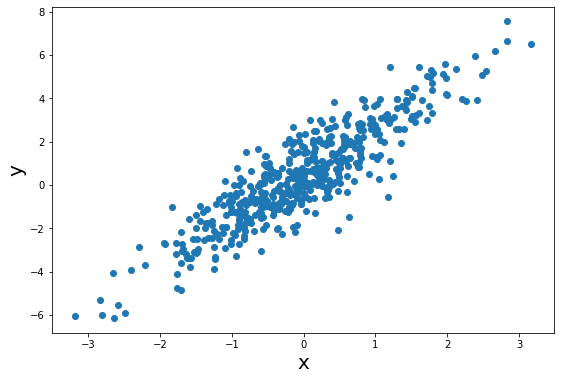

In [37]:
### example
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math

alpha = 0.5
beta = 2.0

x = np.random.normal(0, 1, 500)
y = alpha + beta * x + np.random.normal(0, 1, 500)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()

In [38]:
### define gradient computations
def grad_alpha(alpha, beta, x, y):
  return -np.mean(y - alpha - beta * x)

def grad_beta(alpha, beta, x, y):
  return -np.mean((y - alpha - beta * x) * x)

In [39]:
alpha_hat = 0
beta_hat = 1
gamma = 0.01

for i in range(1000):
  alpha_hat = alpha_hat - gamma * grad_alpha(alpha_hat, beta_hat, x, y)
  beta_hat = beta_hat - gamma * grad_beta(alpha_hat, beta_hat, x, y)

Compare

In [40]:
alpha_hat, beta_hat

(0.4772029324458375, 1.9992884851250583)

In [41]:
alpha, beta

(0.5, 2.0)

### Other approaches

There are many gradient descent variants (we will cover stochastic gradient descent) and other approaches for function minimization. We will not cover all of these here because this is not an optimization class (although...)

We will assume that gradient descent is "good enough" (it is) for our purposes and instead focus on its properties.

## Automatic gradients and pytorch

One of the great side effects of the deep learning revolution is the proliferation of automatic methods for computing derivatives. Stochastic gradient descent is so essential to training modern deep learning systems that an enormous amount of research has gone into "automatic differentiation".

#### Automatic differentiation

Automatic differentiation (autodiff) is a general process for __automatically__ constructing a derivative finding procedure for __almost any__ program that computes a value

There are two kinds of autodiff

1. Forward mode 
2. Reverse mode

We will focus on reverse mode because this is most commonly used for optimization. You'll see why its called reverse mode soon.

note: automatic differentiation is not numerical differentiation.


#### Autodiff libraries

Most deep learning libraries consist of two parts
1. Helper functions for constructing neural networks
2. Autodiff tools

You could pithily state that most deep learning libraries are just autodiff libraries with some neural networks functions tacked on. That wouldnt be correct, but its not that wrong either.

We will use the popular deep learning framework __Pytorch__ for automatic differention in this class. Later we will use it train neural networks. The principle is exactly the same as training "classical methods", so its good practice.


### How to autodiff

Auto differentiation is actually very simple in principle. 

1. Break your complex expression down into a sequence of primitive operations with easy derivatives.
2. Apply the chain rule.

Thats it.

Lets look at an example

### An example to illustrate

Let $x, w, b, y \in \mathbb{R}$

Suppose we have a program that computes the following 

$$
\begin{align}
z &= x w + b \\
\hat y &= \frac{1}{1 + \exp(-z)} \\
\mathcal{L}(w, b) &= (y - \hat y)^2 \\
\end{align}
$$


- We can think of $\mathcal{L}$ as a loss function and $w$ and $b$ as our parameters. 
- We want to minimize $\mathcal{L}$ with respect to $w$ and $b$, so we use gradient descent.
- Need to compute the derivative $\mathcal{L}$ with respect to $w$ and $b$. 

How do we do it?


### Step 1. Convert to primitive sequence

Lets first convert our original program into a sequence of primitive operations

$$
\begin{align}
t_1 &= xw \\
z &= t_1 + b \\
t_2 &= -z \\
t_3 &= \exp(t_2) \\
t_4 &= 1 + t_3 \\
\hat y &= 1 / t_4 \\
t_5 &= y - \hat y \\
\mathcal{L} &= t_5^2
\end{align}
$$

This clearly will compute the same thing as the original program. But each step is now a very simple (one!) operation.

### Step 2. Forward pass

Lets say we want to find $\frac{\partial \mathcal{L}}{\partial w}$

We make a __forward__ pass through the program.  
- Start with $x, y, w, b$ and step through the program until we compute $\mathcal{L}$
- We want to store the intermediate values (they will come up when we compute derivatives).

Suppose the current value of $x = 0.5$, $w = 2$, $b = 1$ and $y = 0.2$. We can step through the program and compute all values.

$$
\begin{align}
t_1 &= 0.5 \times 2 = 1 \\
z &= 1 + 1 = 2 \\
t_2 &= -2 \\
t_3 &= \exp(-2) = 0.135\\
t_4 &= 1 + 0.135 = 1.135 \\
\hat y &= 1 / 1.135 =  0.881 \\
t_5 &= 0.2 - 0.881 = -0.681 \\
\mathcal{L} &= (-0.681)^2 = 0.463
\end{align}
$$


### Step 3. Backward pass

Now we can make a __backward__ pass to compute the derivatives according to the chain rule (this is why its called reverse mode).


#### Part 1. Write out the full chain rule
The full chain rule expression for $\frac{\partial \mathcal{L}}{\partial w}$ is 

$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial t_5}\frac{\partial t_5}{\partial \hat y} \frac{\partial \hat y}{\partial t_4} \frac{\partial t_4}{\partial t_3} \frac{\partial t_3}{\partial t_2}  \frac{\partial t_2}{\partial z} \frac{\partial z}{\partial t_1} \frac{\partial t_1}{\partial w}
$$

#### Part 2. Solve each substep. 
Each "component" of the chain rule is easy to solve because we broke our program down into a long sequence of primitive operations

$$
\frac{\partial \mathcal{L}}{\partial w} = 2t_5 (y - 1) \frac{-1}{t_4^2} 2 \exp(t_2) (-1) (1 + b) (x)
$$

#### Part 3. Plug in and evaluate
Plug everything from the forward pass in
$$
\frac{\partial \mathcal{L}}{\partial w} = 2 (-0.681) (0.2 - 1) \frac{-1}{1.135^2} 2 \exp(-2) (-1) (1 + 1) (0.5) = 0.229
$$


Thats all there is to it! 

Given learning rate $0.1$ we could then update the parameter $w$
$$w \leftarrow 2 - 0.1 \times 0.229 = 1.977$$

And start all over again with another forwards and backwards pass.

You could do the same thing for $b$ following almost identical steps.

This procedure is known as __backpropagation__ in deep learning world. Everywhere else its called the chain rule from calc 1

### Autodiff in pytorch

We will now introduce our main library for autodiff in this class: Pytorch

Later we will use pytorch to fit actual neural networks. For now we will ease into it by optimizing simple functions and classical models.

Its good practice!



__Example__: Convex function 1

Lets minimize the following function 

$$f(x) = x^2$$

we know the actual minimizer, but lets use gradient descent anyways to check.


In [ ]:
import torch

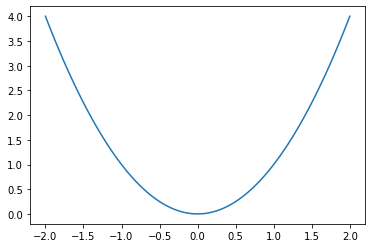

In [ ]:
def func(u):
  return u**2

u = torch.tensor(np.linspace(-2, 2, 100))
z = func(u)

plt.plot(u, z)

In [ ]:
# init parameter at 0.1
u = 0.1 * torch.ones(1)

# enable gradient tracking (means we will compute derivatives of this parameter)
u.requires_grad_()

# loop 1000 times
for _ in range(1000):

  # forward pass: evaluate the function
  eval = func(u)

  # backward pass: compute derivatives
  eval.backward()

  # update parameter
  u.data = u.data - 1e-1 * u.grad

  # clear out gradients (pytorch automatically accumulates gradients each iter)
  u.grad.zero_()

In [ ]:
u.data

tensor([2.8026e-45])

eh good enough

__Example__: Non-convex function

$$f(u) = u \log u + e^{-2u^2} + 0.1 \sin (2 \pi  u)$$

We probably dont know the actual minimzer. Lets use gradient descent.

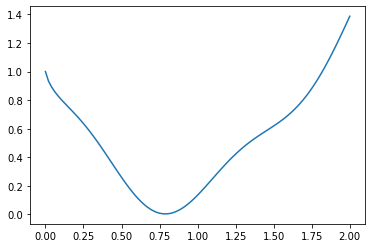

In [ ]:
def func(u):
  return u * torch.log(u) + torch.exp(-2 * u**2) + 0.1 * torch.sin(2 * math.pi * u)

u = torch.tensor(np.linspace(1e-16, 2, 100))
v = func(u)

plt.plot(u, v)

In [ ]:
u = 0.1 * torch.ones(1)
u.requires_grad_()

loss = np.zeros(1000)
uval = np.zeros(1000)
for i in range(1000):
  eval = func(u)
  eval.backward()
  u.data = u.data - 1e-1 * u.grad

  u.grad.zero_()

  loss[i] = eval.data
  uval[i] = u.data

In [ ]:
u.data

tensor([0.7880])

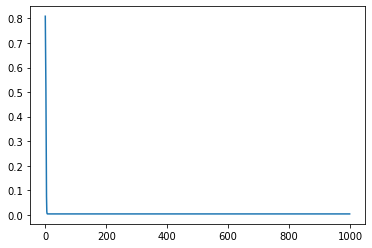

In [ ]:
plt.plot(loss)

__Example__: Convex multivariate function

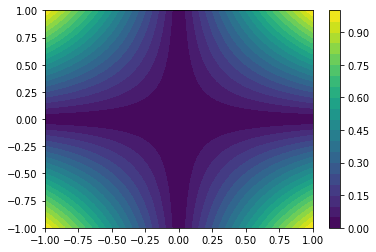

In [ ]:
import torch

def func(u, v):
  return torch.abs(u * v)

u = torch.tensor(np.linspace(-1, 1, 100))
v = torch.tensor(np.linspace(-1, 1, 100))

u, v = torch.meshgrid([u, v])
u = u.reshape(-1, 1)
v = v.reshape(-1, 1)

z = func(u, v).reshape(100, 100)
u = u.reshape(100, 100)
v = v.reshape(100, 100)

plt.contourf(u, v, z, 20)
plt.colorbar()

In [ ]:
u = 0.3 * torch.ones(1)
v = 0.3 * torch.ones(1)

u.requires_grad_()
v.requires_grad_()

n_iter = 1000

loss = np.zeros(n_iter)
uval = np.zeros(n_iter)
for i in range(n_iter):
  eval = func(u, v)
  eval.backward()

  u.data = u.data - 1e-2 * u.grad
  v.data = v.data - 1e-2 * v.grad

  u.grad.zero_()
  v.grad.zero_()

  loss[i] = eval.data

In [ ]:
u.data, v.data

(tensor([1.2951e-05]), tensor([1.2951e-05]))

__Example:__ Linear regression

In linear regression we assume a linear model (prediction function) from $X$ to $Y$ as

$$ Y = \alpha + \beta X + \epsilon$$

and make predictions as

$$\hat{Y} = \alpha + \beta X$$

after we learn the values of $\alpha$ and $\beta$.

As stated in the previous section we have to learn a statistical relationship, which means don't know the statistical relationship, which means we don't know what $f$ is

Instead we can specify the __type of model__ we want to use. Formally, a pre-supposed __family of predictors__ $\mathcal{F}$
  - These are all the possible predictors we will consider. Different problems require different families of predictors. 
  - Ex. linear predictors $f \in \mathcal{F}$ s.t. $f(x) = \alpha + \beta x$
  - Impossible to learn an arbitrary predictor from features to targets
  - Instead we impose structure on the relationship between features and targets, such as a linear relationship.
  - $\mathcal{F}$ is also known as a hypothesis class

__Example:__ Linear regression

We suppose $\mathcal{F}$ is all linear models, i.e. $f(x) = \alpha + \beta x$ so we model $Y$ as

$$ Y = \alpha + \beta X + \epsilon$$

where $\alpha$ and $\beta$ are unknown. Some examples from this class are plotted below

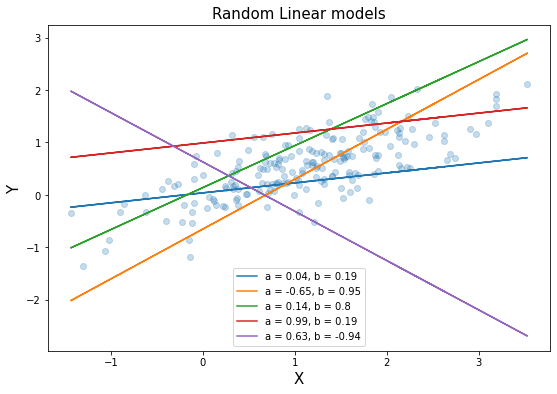

In [ ]:
np.random.seed(1)
x = np.random.normal(1, 1, 200)
y = 0.5 * x + np.random.normal(0, 0.4, 200)

alpha = np.round(np.random.uniform(-1, 1, 5), 2)
beta = np.round(np.random.uniform(-1, 1, 5).reshape(-1, 1), 2)

lm = alpha[:,None] + beta @ x.reshape(1, -1)
lm = lm.T

plt.figure(figsize = (9, 6))
plt.scatter(x, y, alpha = 0.25)
plt.plot(x, lm[:,0], label = f'a = {alpha[0]}, b = {beta[0][0]}')
plt.plot(x, lm[:,1], label = f'a = {alpha[1]}, b = {beta[1][0]}')
plt.plot(x, lm[:,2], label = f'a = {alpha[2]}, b = {beta[2][0]}')
plt.plot(x, lm[:,3], label = f'a = {alpha[3]}, b = {beta[3][0]}')
plt.plot(x, lm[:,4], label = f'a = {alpha[4]}, b = {beta[4][0]}')
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.title('Random Linear models', fontsize = 15)
plt.legend()
plt.show()

Clearly some of the above lines "fit" the data better than others 

How do we determine which line is best? (including those not plotted)

In other words, how do we find the optimal model $f$ from our class $\mathcal{F}$?